In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Microsoft_Stock_Price_History.csv to Microsoft_Stock_Price_History.csv


Mean Absolute Error (MAE): 1.726
Root Mean Squared Error (RMSE): 2.239
     Actual   Predicted
95   428.90  430.439340
244  372.65  372.356584
86   399.61  403.583348
190  409.14  406.214260
137  430.52  429.994309


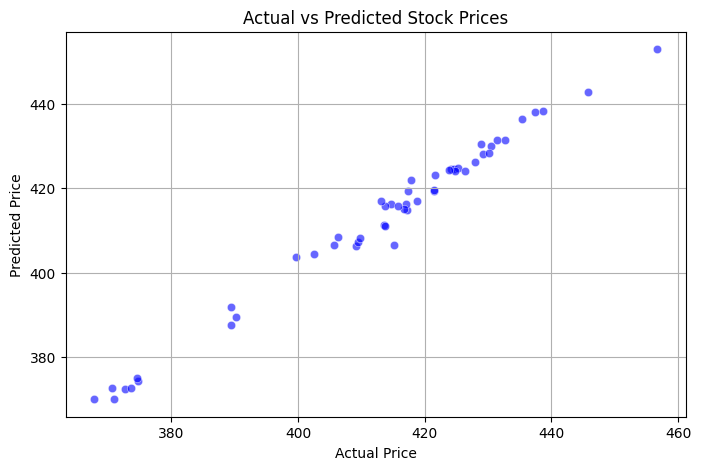

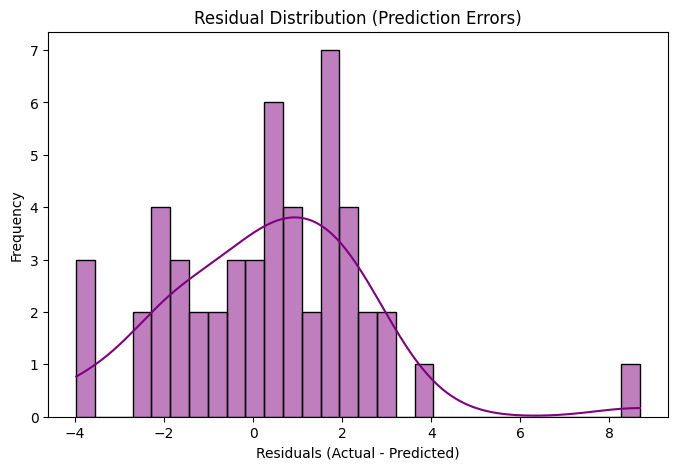

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Microsoft_Stock_Price_History.csv")

# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Clean and convert 'Vol.' column
def convert_volume(val):
    if isinstance(val, str):
        val = val.replace(',', '').strip()
        if 'M' in val:
            return float(val.replace('M', '')) * 1_000_000
        elif 'K' in val:
            return float(val.replace('K', '')) * 1_000
        elif val == '-':
            return None
        else:
            return float(val)
    return val

df['Vol.'] = df['Vol.'].apply(convert_volume)

# Create new feature: Daily Range (High - Low)
df['Daily Range'] = df['High'] - df['Low']

# Drop rows with missing values
df = df.dropna()

# Select features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Vol.', 'Daily Range']]
y = df['Price']

# --- Step 1: Split into Train/Test sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 2: Build Baseline Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Step 3: Make Predictions ---
y_pred = model.predict(X_test)

# --- Step 4: Evaluate Model ---
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

# --- Step 5: Compare Actual vs Predicted ---
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

# --- Step 6: Plot Comparison ---
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

# --- Step 7: Residual Plot ---
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title("Residual Distribution (Prediction Errors)")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()
